# Hands On #8

**Chapter 17 – Autoencoders and GANs**

❗️ **This will be very slow, unless you have a GPU (Check the instruction in https://github.com/UAPH4582/PH482_582/blob/main/INSTALL.md).**

❗️ **If you do not, then you should run this notebook in Colab, using a GPU runtime**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/08_autoencoders_and_gans.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Due date: 2022-04-11

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"08_autoencoders_and_gans_group42_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A couple utility functions to plot grayscale 28x28 image:

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Simple linear Autoencoder (=PCA)

Build 3D dataset:

In [3]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    """create some 3d data with noise"""
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(1000)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [31]:
X_train.shape

(1000, 3)

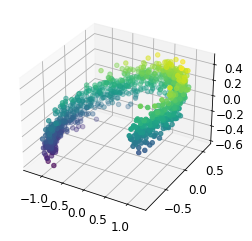

In [4]:
ax = plt.axes(projection="3d")
ax.scatter3D(X_train[:,0], X_train[:,1], X_train[:,2], c=X_train[:,2], cmap="viridis")

Let's try to "compress" the data using an autoencoder.

As a sidenote: Compression is tightly linked to intelligence and there are even arguments
that compression might be all there is to intelligence.   
If you are interested in this topic you can read about the [Hutter prize](http://prize.hutter1.net/hrules.htm).

Now let's build the Autoencoder...

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

# encoder: from 3 to 2 dimensions
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
# decoder: from 2 to 3 dimensions
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])


In [6]:
keras.utils.plot_model(encoder, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [7]:
keras.utils.plot_model(decoder, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Task 1: 
If you don't understand autoencoders, we strongly recommend reading the parts in the book (Chapter 17) first.

a) Build an autoencoder model with the two subcomponents: the encoder and the decoder. All you have to do is to "stack" the encoder and decoder, `[encoder, decoder]` in a `keras.models.Sequential`.   
b) Compile the model with `mse` loss and SGD optimizer with `lr=1`.   
c) Train the model (20 epochs) on the dataset created above. Think about what `X` and `y` need to be for training the autoencoder. Remember that you want to reconstruct the input with an autoencoder.       
d) Encode the dataset using only the trained encoder. The `encoder` will be mutated by the autoencoder training, so you can just use it to do this step because it is already trained. Call the output `codings` for the plotting code below.   
e) Look at the plot of the encodings and explain the purpose of this encoder.    
f) Decode the encodings again and plot them in 3D using the same code as above when we plot `X_train`.


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [23]:
# a) Build an autoencoder model with the two subcomponents: the encoder and the decoder.
AE = keras.models.Sequential([encoder,decoder])

In [22]:
AE.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 8         
_________________________________________________________________
sequential_3 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [25]:
# b) Compile the model with mse loss and SGD optimizer with lr=1
optimizer = keras.optimizers.SGD(learning_rate=1)
AE.compile(loss='mse',optimizer=optimizer)

In [26]:
# c) Train the model (20 epochs) on the dataset created above
AE.fit(X_train,X_train,epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0548
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 13/20
32/32 [==============================

In [30]:
X_train.shape

(1000, 3)

In [35]:
# d) Encode the dataset using only the trained encoder. 
encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [39]:
codings = encoder.predict(X_train)
print(codings.shape)

(1000, 2)


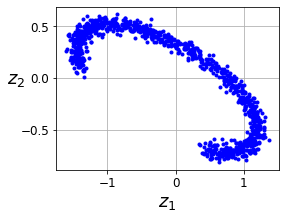

In [40]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [42]:
# e) Look at the plot of the encodings and explain the purpose of this encoder.
answer = "The purpose of the enconder is to provide a compressed representation of the input."
"For this case, a 2D representation of the 3D dataset."

'For this case, a 2D representation of the 3D dataset.'

In [45]:
output = decoder.predict(codings)
print(output.shape)

(1000, 3)


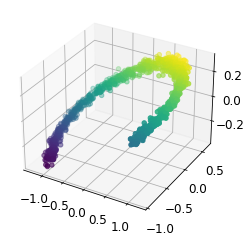

In [46]:
# f) Decode the encodings again and plot them in 3D using the same code as above when we plot X_train.

ax = plt.axes(projection="3d")
ax.scatter3D(output[:,0], output[:,1], output[:,2], c=output[:,2], cmap="viridis")


# Autoencoder for MNIST
Let's use the MNIST dataset.

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

Let's build a stacked Autoencoder with 3 hidden layers and 1 output layer (i.e., 2 stacked Autoencoders).

In [73]:
encoder2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

In [52]:
encoder2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


## Task 2: 
a) Above the code for the encoder is given. Build the corresponding decoder (`decoder2`). The last layer of the decoder will have to be `keras.layers.Reshape([28, 28])`. Just like in task 1, build `autoencoder2` from `encoder2` and `decoder`.   
b) Compile the model using binary cross entropy,  SGD optimizer with `lr=1.0` and `accuracy` as metrics.   
c) Train the model using `X_train` (10 epochs) as both the inputs and the targets (and similarly, use `X_valid` as both the validation inputs and targets).    
d) Using the function `show_reconstructions` below, look at the reconstructions and comment on them.   
e) Run these 2 commands:
`X_train[0].shape` and  `encoder2.predict(X_train[0:1])[0].shape` and explain their outputs.

In [14]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    #print(reconstructions.shape)
    #print(images.shape)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        #print(image_index)
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [79]:
# Build the corresponding decoder
decoder2 = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Build autoencoder 
autoencoder2 = keras.models.Sequential([encoder2,decoder2])

In [75]:
autoencoder2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_22 (Sequential)   (None, 30)                81530     
_________________________________________________________________
sequential_23 (Sequential)   (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [80]:
# b) Compile the model using binary cross entropy, SGD optimizer with lr=1.0 and accuracy as metrics.
optimizer = keras.optimizers.SGD(learning_rate=1.0)
autoencoder2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [81]:
# c) Train the model using X_train (10 epochs).
history = autoencoder2.fit(X_train, X_train, validation_data=(X_valid,X_valid), epochs=10)

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4057 - accuracy: 0.0582 - val_loss: 0.3451 - val_accuracy: 0.0822
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3295 - accuracy: 0.0921 - val_loss: 0.3231 - val_accuracy: 0.0984
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3157 - accuracy: 0.0992 - val_loss: 0.3151 - val_accuracy: 0.1000
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3109 - accuracy: 0.1018 - val_loss: 0.3105 - val_accuracy: 0.1007
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3075 - accuracy: 0.1056 - val_loss: 0.3079 - val_accuracy: 0.1085
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3045 - accuracy: 0.1101 - val_loss: 0.3049 - val_accuracy: 0.1085
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3020 - accuracy: 0.1142 - val_loss: 0.3025 - val_accurac

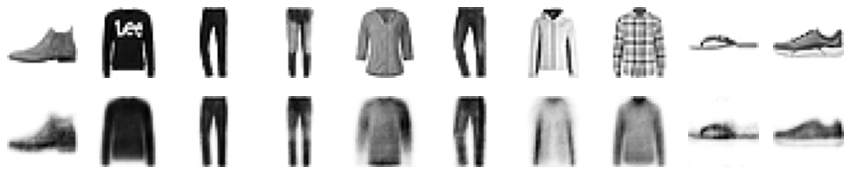

In [112]:
# d) Using the function show_reconstructions below, look at the reconstructions and comment on them.
show_reconstructions(autoencoder2, images=X_test, n_images=10)

Task2d answer: 'The autoencoder reconstruction provides the original inputs with a lower resolution. It is possible to identify the objects, but some minor details (i.e. prints on the shirts, details on the shoes) are lost during the compression process.'

In [114]:
# e) Run these 2 commands: X_train[0].shape and encoder2.predict(X_train[0:1])[0].shape and explain their outputs.
print(X_train[0].shape)
print(encoder2.predict(X_train[0:1])[0].shape)


(28, 28)
(30,)


task 2e answer: The input images have 28 x 28 pixels as its dimensions. After the encoder process, these same images are now represented by 30-dimension object, which means that some information was lost. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### "Looking" at the encoding
Here we wil in some sense "look" at the encoding.
We will use TSNE to transform the encoding to 2D and then plot in a 2D plane.

No questions to anwer here, just look at the plots.

In [115]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder2.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


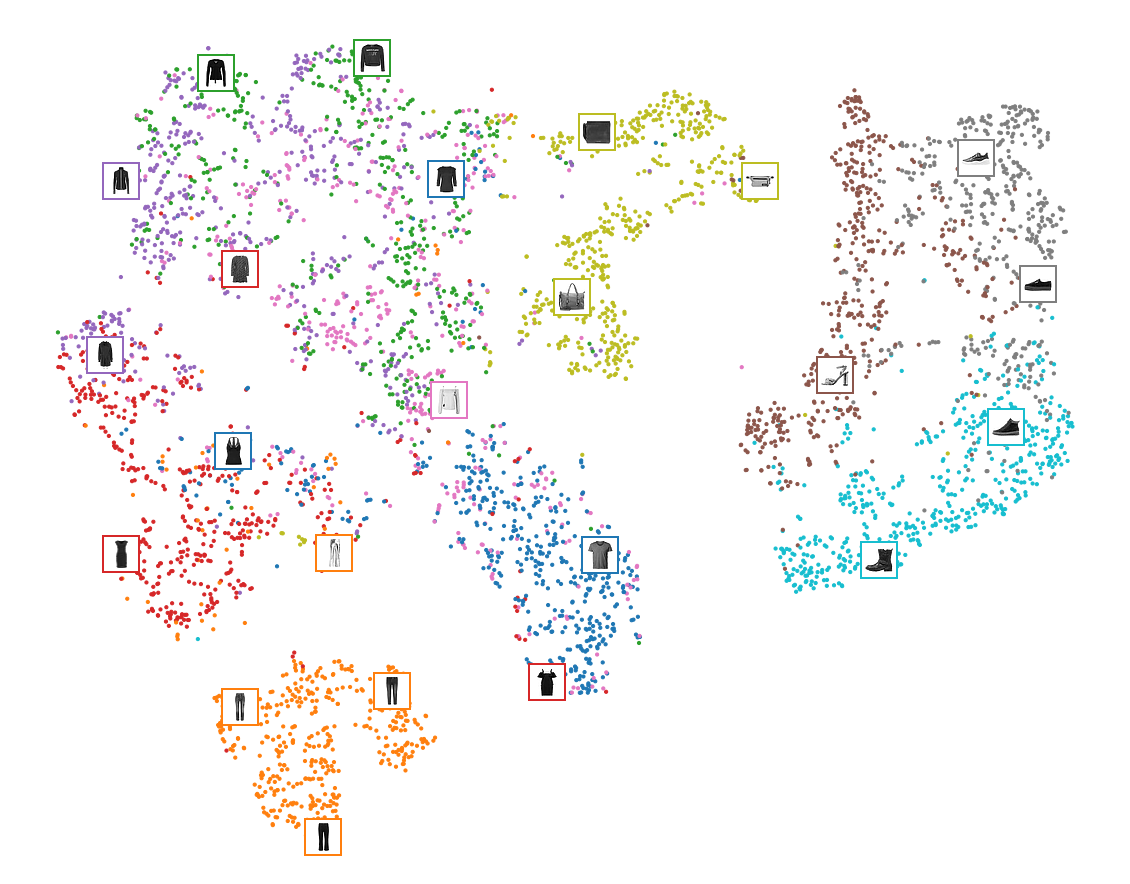

In [117]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(20, 16))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

## Using Convolutional Layers Instead of Dense Layers

Let's build a stacked Autoencoder with 3 hidden layers and 1 output layer (i.e., 2 stacked Autoencoders).

In [118]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])


In [119]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)        

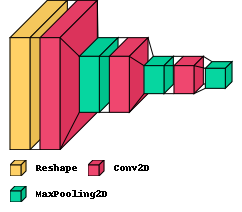

In [123]:
import visualkeras
# depending on your installation you might have to run `pip install visualkeras` (in a separate cell)
visualkeras.layered_view(conv_encoder, legend=True)

Above is a visual representation of the encoder. Alas visualkeras does not support `Conv2

### Task 3:
a) Build an autoencoder model with the two subcomponents: the convolutional encoder and the convolutional decoder.   
b) Compile the model using binary cross entropy,  SGD optimizer with lr=1.0 and `[accuracy]` as metrics.   
c) Train the model using X_train (10 epochs) as both the inputs and the targets (and similarly, use X_valid as both the validation inputs and targets).    
d) Is the CNN autoencoder better than dense layer's autoencoders? Why?   
e) What is the shape/size of the input and what is the shape/size of the encoding? Compare to the autoencoder above. (This is similar to task 2e)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [125]:
# a) Build an autoencoder model 
conv_ae = keras.models.Sequential([conv_encoder,conv_decoder])

In [126]:
# b) Compile the model using binary cross entropy, SGD optimizer with lr=1.0 and [accuracy] as metrics.
optimizer = keras.optimizers.SGD(learning_rate=1.0)
conv_ae.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [127]:
# c) Train the model using X_train (10 epochs).
history = autoencoder2.fit(X_train, X_train, validation_data=(X_valid,X_valid), epochs=10)

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2960 - accuracy: 0.1259 - val_loss: 0.2982 - val_accuracy: 0.1258
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2951 - accuracy: 0.1285 - val_loss: 0.2980 - val_accuracy: 0.1246
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2942 - accuracy: 0.1303 - val_loss: 0.2967 - val_accuracy: 0.1418
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2935 - accuracy: 0.1325 - val_loss: 0.2948 - val_accuracy: 0.1301
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2927 - accuracy: 0.1348 - val_loss: 0.2939 - val_accuracy: 0.1331
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2921 - accuracy: 0.1358 - val_loss: 0.2934 - val_accuracy: 0.1311
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2914 - accuracy: 0.1376 - val_loss: 0.2947 - val_accur


Task 3d answer: The CNN typically are better suited to deal with images, so it isn't different for the autoencoders, since we have a improve in the accuracy of the model. 

In [131]:
# e) Run these 2 commands: X_train[0].shape and encoder2.predict(X_train[0:1])[0].shape and explain their outputs.
print(X_train[0].shape)
print(conv_encoder.predict(X_train[0:1])[0].shape)
'The input is a 28x28 image, which are now represented by an object with shape 3x3x64. '


(28, 28)
(3, 3, 64)


'The input, a 28x28 image, are now represented by an object with shape 3x3x64. '

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

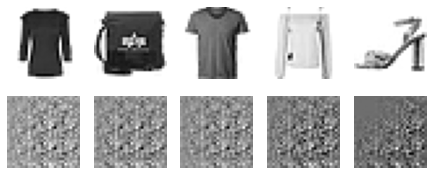

In [129]:
show_reconstructions(conv_ae)
plt.show()

# Denoising Autoencoder

Below we have a similar autoencoder as before, but with an extra `GaussianNoise` layer directly after the input.

In [132]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

### Task 4:
a) Build an autoencoder model with the two subcomponents: the encoder and the decoder.   
b) Compile the model using binary cross entropy,  SGD optimizer with lr=1.0 and `rounded_accuracy` as metrics.   
c) Train the model using X_train (10 epochs) as both the inputs and the targets (and similarly, use X_valid as both the validation inputs and targets).    
d) Explain why adding Gaussian noise to the input would help the autoencoder to learn.   

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [9]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [135]:
denoising_ae = keras.models.Sequential([denoising_encoder,denoising_decoder])
denoising_ae.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, validation_data=(X_valid,X_valid), epochs=10)

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3122 - rounded_accuracy: 0.9096 - val_loss: 0.3084 - val_rounded_accuracy: 0.9159
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3063 - rounded_accuracy: 0.9146 - val_loss: 0.3036 - val_rounded_accuracy: 0.9194
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3027 - rounded_accuracy: 0.9178 - val_loss: 0.3003 - val_rounded_accuracy: 0.9221
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2999 - rounded_accuracy: 0.9202 - val_loss: 0.2977 - val_rounded_accuracy: 0.9240
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2976 - rounded_accuracy: 0.9222 - val_loss: 0.2958 - val_rounded_accuracy: 0.9246
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2961 - rounded_accuracy: 0.9235 - val_loss: 0.2946 - val_rounded_accuracy: 0.9264
Epoch 7/10
1719/1719 [===============

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

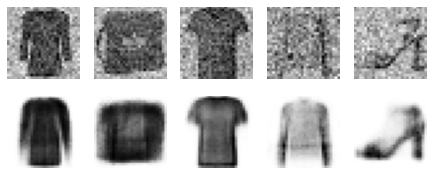

In [136]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

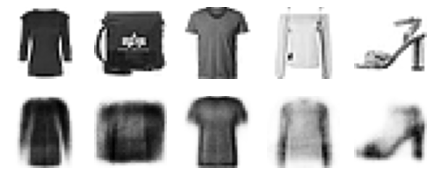

In [137]:
show_reconstructions(denoising_ae, X_valid)   # denoising autoencoder applied to "sharp" images
plt.show()

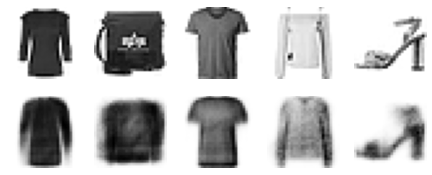

In [138]:
show_reconstructions(autoencoder2, X_valid)   # original autoencoder without Gaussian noise
plt.show()

# Variational Autoencoder

### Task 5:
Below you see the implementation of a variational autoencoder.   

a) Explain how a variational autoencoder works. What are the differences to a normal autoencoder?   
b) Explain how you would "generate" new data with a variational autoencoder.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 5a) answer: A variational autoencoder is a generative autoencoder, having the capability of the generation of new instances that look like they were sampled for the training set. The variatonal autoencoder is also probabilistic, meaning that their outputs are partly determined by chance, and not by a randomized method. 

Task 5b) answer: A standard autoencoder produces a coding for a given input, while a variational autoencoder is capable of produce a mean coding and a standard deviation. In that way, the actual coding, produced by the autoencoder, is a random sample of a Gaussian distribution with the mean coding and its standard deviation. After the coding part, the decoder is able to decode the sampling coding, as a standard autoencoder. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [3]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [4]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [51]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)

In [57]:
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=rounded_accuracy)
history = variational_ae.fit(X_train, X_train, epochs=1, 
                             validation_data=(X_valid, X_valid))

1719/1719 [==============================] - 17s 10ms/step - loss: 0.3532 - rounded_accuracy: 0.8890 - val_loss: 0.3345 - val_rounded_accuracy: 0.9016


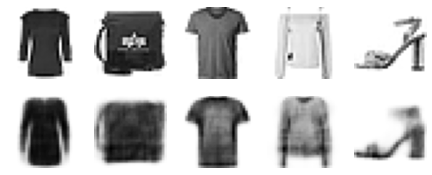

In [15]:
show_reconstructions(variational_ae)
plt.show()

## Generate Fashion Images
Now that we have a variational autoencoder, we can use it to generate fishion images.

In [16]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Let's generate a few random codings, decode them and plot the resulting images:

### Task 6:
a) Take the encoding of the first image `X_train[0:1]` and add multiples (-10 to 10) of `np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])`. Decode and plot using `plot_multiple_images()`. Hint: The output of `variational_encoder` is `[codings_mean, codings_log_var, codings]` and you only need the codings, not the mean and var.   
b) Generate few (e.g. 12) random codings using for example [tf.random.normal](https://www.tensorflow.org/api_docs/python/tf/random/normal). Decode them and plot the resulting images using `plot_multiple_images(images, 4)`:

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [58]:
codings.shape

TensorShape([None, 10])

In [53]:
final = codings + codings_size*np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [55]:
images = variational_decoder(final).numpy()
plot_multiple_images(images, 4)

TypeError: len is not well defined for symbolic Tensors. (functional_15/reshape_2/Reshape_2:0) Please call `x.shape` rather than `len(x)` for shape information.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

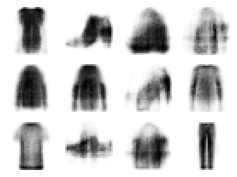

In [59]:
# b)


tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
#save_fig("vae_generated_images_plot", tight_layout=False)

Now let's perform semantic interpolation between these images:

# Generative Adversarial Networks

### Task 7:
Look at the GAN implementation below.   
a) Explain what a Generative Adversarial Network does.   
b) Run the code below. During every epoch it plots a few images. Comment on the "progress" from epoch 1 to 50.
The training takes a very long time, you can also simply go to [this link](https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb) and
look at the output under the section "Generative Adversarial Networks".

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 7 a) answer: A generative model consists in the discovery and learn of the patterns in the input data, allowing the model to be capable of generate new instances (outputs) that could have been drawn from the original dataset. A Generative Adversarial Netowrk (GAN) frames the generative modelling as a supervised learning problem, and it are composed by two sub-models. At first, a generator model used to generate new examples and at second, a discriminator model able to classify the examples provenient of the input or generated by the model. The two models are trained together in a zero-sum game, adversarial, until the discriminator model provides wrong classifications about half the time, which means that the generator model is generating plausible examples.

Task 7b) answer: With the epochs progressing the generated images gets more detailed, with more pixels, which allows a better identification of the shape and the size of the clothes. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])


In [61]:
gan = keras.models.Sequential([generator, discriminator])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [62]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [63]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)
        plt.show()

Epoch 1/1


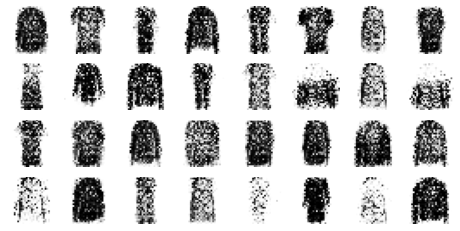

In [64]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

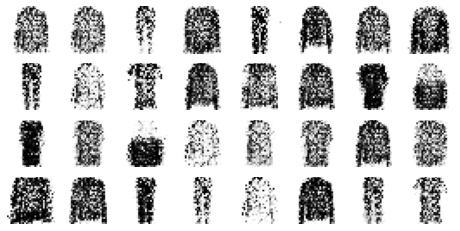

In [65]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size) # 50 epochs 

# Deep Convolutional GAN
This is the convolutional variant of the GAN. Again, you can simply look at the ouptut from the [link](https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb).

### Task 8:
a) Comment on the training progress of the Deep Convolutional GAN.   
b) Compare the results from the Deep Convolutional GAN with the results from task 7.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 8 a) answer: The Deep Convolutional GAN provides images with more pixels allowing the observation of the clothes' details, like prints, and allowing to observe the difference between clothes with light and dark colours.

Task 8b) answer: The Deep Conv. GAN provides better results, since it is easier to identify the clothes and its particular details, in comparison with the GAN from exercise 7. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [66]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [67]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [68]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [69]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)